# Author : Uppalapati Venkata Likhith Sasank

The Sparks Foundation

Datascience and Business Analytics Internship

GripMay21

Task5:Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\TSF DATA SCIENCE AND BUSINESS ANALYTICS INTERN\matches.csv')

In [3]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [5]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
data.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [10]:
data.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


<AxesSubplot:>

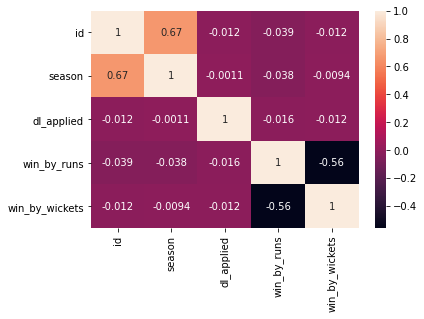

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data['player_of_match']

0      Yuvraj Singh
1         SPD Smith
2           CA Lynn
3        GJ Maxwell
4         KM Jadhav
           ...     
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 756, dtype: object

In [13]:
data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
Mohammed Siraj     1
DJG Sammy          1
MR Marsh           1
MS Gony            1
SA Yadav           1
Name: player_of_match, Length: 226, dtype: int64

In [14]:
first_batting = data[data['win_by_runs']!=0]

In [17]:
data['win_by_runs']

0      35
1       0
2       0
3       0
4      15
       ..
751     0
752     0
753     0
754     0
755     1
Name: win_by_runs, Length: 756, dtype: int64

In [18]:
first_batting

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


In [19]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [21]:
#Team won by maximum runs
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [24]:
data['winner']


0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object

In [26]:
#Team won by maximum wickets
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [28]:
data.iloc[data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [29]:
data.iloc[data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [30]:
#Team won by minimum wickets
data.iloc[data['win_by_runs'].idxmax()]


id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

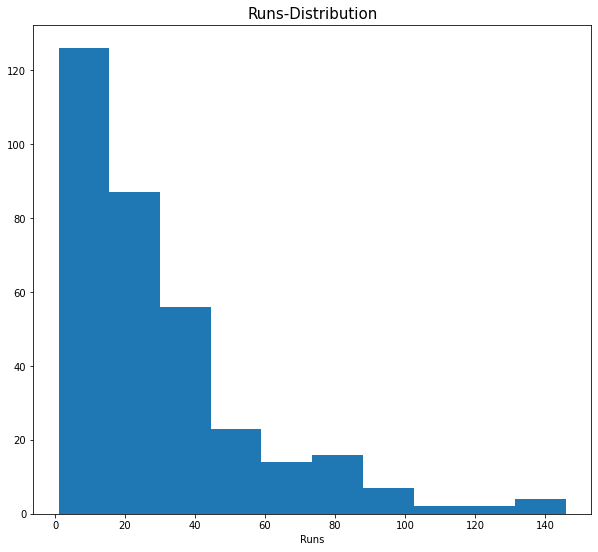

In [39]:
plt.figure(figsize=(10,9))
plt.hist(first_batting['win_by_runs'])
plt.title('Runs-Distribution',fontsize=15)
plt.xlabel('Runs')
plt.show()

<AxesSubplot:xlabel='win_by_runs', ylabel='count'>

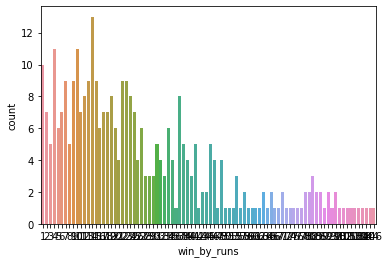

In [32]:
sns.countplot(x='win_by_runs',data=first_batting)

In [34]:
#second-batting
second_batting=data[data['win_by_wickets']!=0]


In [35]:
second_batting

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


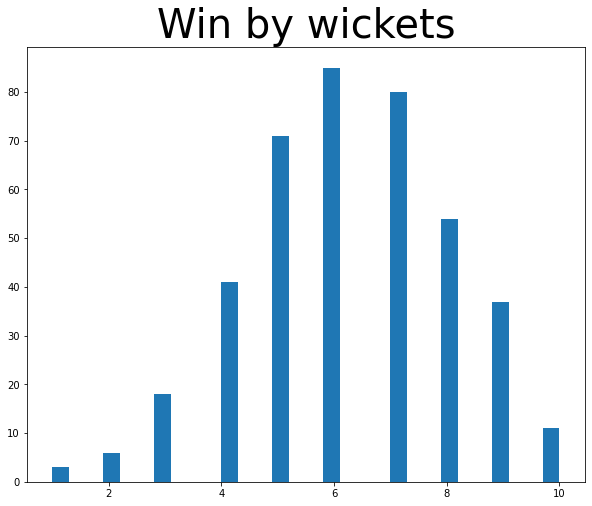

In [40]:
plt.figure(figsize=(10,8))
plt.hist(second_batting['win_by_wickets'],bins=30)
plt.title('Win by wickets',fontsize=40)
plt.show()

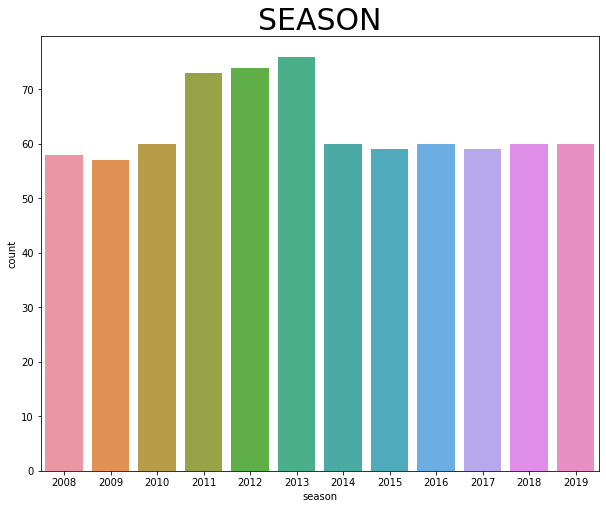

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='season',data=data)
plt.title('SEASON',fontsize=30)
plt.show()

In [53]:
#selecting top 10 players 
top_players = data.player_of_match.value_counts()[:10]
top_players

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

In [56]:
top_players.index

Index(['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'DA Warner', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'AM Rahane'],
      dtype='object')

<Figure size 720x648 with 0 Axes>

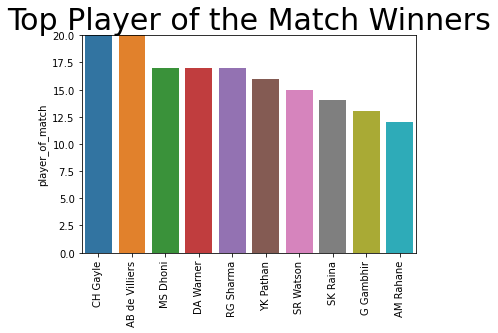

In [60]:
plt.figure(figsize=(10,9))
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('Count')
ax.set_title('Top Player of the Match Winners')
plt.title('Top Player of the Match Winners',fontsize=30)
top_players.plot.bar()
sns.barplot(x=top_players.index,y=top_players,orient='v',palette='tab10');
plt.show()

# From the above data analysis and visualization,It is clear that CH Gayle,AB de Villiers are the top most players of IPL.We can clearly come to know that out of every 10 players there are atleast 4 overseas players.